<a href="https://colab.research.google.com/github/bcrbandung/WWCodeDataScience/blob/master/mobility_google.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt

import ipywidgets as widgets
from IPython.display import display

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving okt.csv to okt.csv
User uploaded file "okt.csv" with length 802994 bytes


In [4]:
gmr_df = pd.read_csv('okt.csv')
gmr_df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline
0,ID,Indonesia,Aceh,NaN,NaN,ID-AC,NaN,ChIJvcR8UN-bOTARYMogsoCdAwE,1/1/2021,-11,6
1,ID,Indonesia,Aceh,NaN,NaN,ID-AC,NaN,ChIJvcR8UN-bOTARYMogsoCdAwE,1/2/2021,-8,9
2,ID,Indonesia,Aceh,NaN,NaN,ID-AC,NaN,ChIJvcR8UN-bOTARYMogsoCdAwE,1/3/2021,-7,6
3,ID,Indonesia,Aceh,NaN,NaN,ID-AC,NaN,ChIJvcR8UN-bOTARYMogsoCdAwE,1/4/2021,-8,10
4,ID,Indonesia,Aceh,NaN,NaN,ID-AC,NaN,ChIJvcR8UN-bOTARYMogsoCdAwE,1/5/2021,-8,11


In [5]:
categories_google_mobility = ['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline']
categories_google_mobility

['retail_and_recreation_percent_change_from_baseline',
 'grocery_and_pharmacy_percent_change_from_baseline']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


retail_and_recreation_percent_change_from_baseline


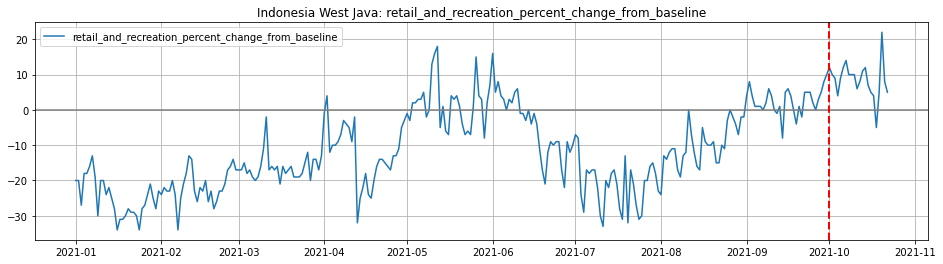

grocery_and_pharmacy_percent_change_from_baseline


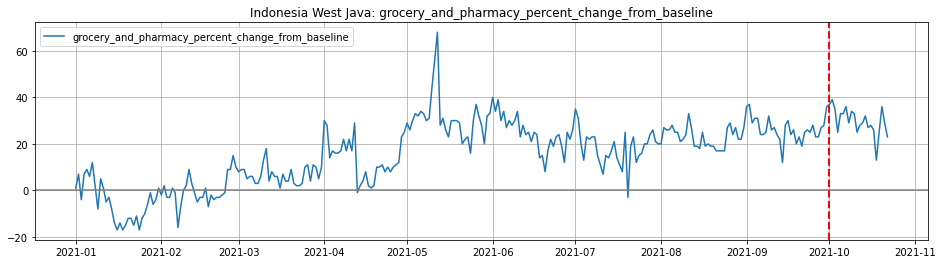

In [6]:
country = 'Indonesia'
region = 'West Java'
sub_df = gmr_df[(gmr_df['country_region'] == country) & (gmr_df['sub_region_1'] == region)]
sub_df.loc[:,'date'] = pd.to_datetime(sub_df.loc[:, 'date'])
sub_df = sub_df.sort_values('date', ascending=True)

for group in categories_google_mobility:
    print(group)
    
    fig, ax = plt.subplots(figsize=(16,4))
    plt.plot(sub_df['date'], sub_df[group], label=group)
    ax.axhline(y=0, color='gray')
    ax.axvline(pd.to_datetime('2021-10-01'), color ='r', linestyle='--', lw=2)
    plt.title(country + ' ' +region + ': ' + group)
    plt.legend(loc='best')
    plt.grid()
    plt.show()